# 2.2.7 例題 : カンニングをした学生の割合
学生が試験中にカンニングする頻度を求めたい。観測データは個人がカンニングしたかどうかは特定できない、以下のアルゴリズムを用いる。

1. コイントスを(こっそり)行い、表が出たら正直に答える
2. 裏が出た場合、もう一枚コインを(こっそり)投げ、表が出たら「カンニングした」と答え、裏が出たら「カンニングしなかった」と答える

サンプル数が100, 「カンニングした」と答えた人が35だとする

In [1]:
using Distributed
addprocs(3)

3-element Array{Int64,1}:
 2
 3
 4

In [2]:
@everywhere using Mamba
using Plots

In [3]:
N = 100
X = 35

35

In [4]:
model = Model(
    obs = Stochastic(
        (proportion, N) -> Binomial(N, proportion),
        false
    ),
    
    proportion = Logical(
        (true_answers, first_coin_flips, second_coin_flips) ->
            (observed = @.(first_coin_flips * true_answers + (1 - first_coin_flips) * second_coin_flips);
            mean(observed)),
        false
    ),
    
    true_answers = Stochastic(1, p -> Bernoulli(p), false),
    
    first_coin_flips = Stochastic(1, () -> Bernoulli(0.5), false),
    second_coin_flips = Stochastic(1, () -> Bernoulli(0.5), false),
    
    p = Stochastic(() -> Uniform()),
)

Object of type "Model"
-------------------------------------------------------------------------------
true_answers:
An unmonitored node of type "0-element ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
first_coin_flips:
An unmonitored node of type "0-element ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
p:
A monitored node of type "ScalarStochastic"
NaN
-------------------------------------------------------------------------------
proportion:
An unmonitored node of type "ScalarLogical"
NaN
-------------------------------------------------------------------------------
obs:
An unmonitored node of type "ScalarStochastic"
NaN
-------------------------------------------------------------------------------
second_coin_flips:
An unmonitored node of type "0-element ArrayStochastic{1}"
Float64[]


In [5]:
data = Dict{Symbol, Any}(
    :obs => X,
    :N => N,
)

Dict{Symbol,Any} with 2 entries:
  :N   => 100
  :obs => 35

In [6]:
inits = [
    Dict{Symbol, Any}(
        :obs => X,
        :proportion => 0.5,
        :true_answers => rand(Bernoulli(), N),
        :first_coin_flips => rand(Bernoulli(), N),
        :second_coin_flips => rand(Bernoulli(), N),
        :p => rand(Uniform()),
    ) for _ in 1:3
]

3-element Array{Dict{Symbol,Any},1}:
 Dict(:true_answers=>[0, 1, 1, 1, 0, 1, 0, 1, 0, 0  …  0, 0, 1, 0, 1, 0, 0, 0, 1, 1],:first_coin_flips=>[1, 1, 1, 0, 0, 1, 1, 1, 1, 1  …  1, 1, 0, 1, 0, 0, 0, 0, 1, 0],:p=>0.943433,:proportion=>0.5,:obs=>35,:second_coin_flips=>[0, 1, 1, 0, 0, 1, 0, 1, 1, 1  …  1, 0, 0, 1, 0, 1, 1, 0, 0, 0])
 Dict(:true_answers=>[1, 1, 0, 0, 1, 1, 1, 1, 1, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1],:first_coin_flips=>[1, 1, 1, 0, 0, 1, 1, 1, 0, 0  …  1, 1, 0, 1, 0, 0, 0, 0, 1, 0],:p=>0.619791,:proportion=>0.5,:obs=>35,:second_coin_flips=>[0, 0, 1, 0, 1, 1, 0, 1, 0, 0  …  0, 0, 1, 0, 0, 1, 0, 1, 0, 0])
 Dict(:true_answers=>[0, 0, 0, 0, 1, 1, 1, 1, 0, 0  …  1, 0, 0, 0, 1, 1, 1, 0, 0, 0],:first_coin_flips=>[0, 0, 0, 0, 0, 1, 1, 0, 0, 1  …  0, 0, 1, 1, 1, 1, 1, 1, 0, 1],:p=>0.551013,:proportion=>0.5,:obs=>35,:second_coin_flips=>[0, 0, 1, 1, 1, 0, 0, 1, 0, 1  …  0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

## サンプリング方法を変えて試してみる

In [11]:
samplings = 100000
burning = 20000

20000

### BIA

MCMC Simulation of 100000 Iterations x 3 Chains...

      From worker 3:	Chain 3:   0% [0:03:21 of 0:03:21 remaining]
      From worker 2:	Chain 1:   0% [0:03:28 of 0:03:28 remaining]
      From worker 4:	Chain 2:   0% [0:04:08 of 0:04:08 remaining]
      From worker 3:	Chain 3:  10% [0:01:46 of 0:01:58 remaining]
      From worker 4:	Chain 2:  10% [0:01:48 of 0:02:00 remaining]
      From worker 2:	Chain 1:  10% [0:01:48 of 0:02:00 remaining]
      From worker 3:	Chain 3:  20% [0:01:32 of 0:01:55 remaining]
      From worker 2:	Chain 1:  20% [0:01:34 of 0:01:58 remaining]
      From worker 4:	Chain 2:  20% [0:01:35 of 0:01:59 remaining]
      From worker 3:	Chain 3:  30% [0:01:20 of 0:01:54 remaining]
      From worker 2:	Chain 1:  30% [0:01:21 of 0:01:56 remaining]
      From worker 4:	Chain 2:  30% [0:01:22 of 0:01:58 remaining]
      From worker 3:	Chain 3:  40% [0:01:08 of 0:01:53 remaining]
      From worker 2:	Chain 1:  40% [0:01:09 of 0:01:56 remaining]
      From worker 4:	Cha

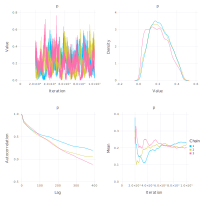

      From worker 4:	Chain 2: 100% [0:00:00 of 0:01:57 remaining]
      From worker 4:	


In [12]:
scheme_bia = [NUTS(:p), BIA([:true_answers, :first_coin_flips, :second_coin_flips])]
setsamplers!(model, scheme_bia)
sim_bia = mcmc(model, data, inits, samplings, burnin = burning, thin = 10, chains = 3)
p_bia = reshape(Mamba.plot(sim_bia, [:trace, :density, :autocor, :mean], legend = true), (2, 2))
Mamba.draw(p_bia, nrow = 2, ncol = 2)

In [16]:
gelmandiag(sim_bia, mpsrf = true, transform = true)

              PSRF 97.5%
           p 1.014 1.042
Multivariate 1.021   NaN



### BMC3

MCMC Simulation of 100000 Iterations x 3 Chains...

      From worker 3:	Chain 2:   0% [0:03:22 of 0:03:22 remaining]
      From worker 2:	Chain 1:   0% [0:04:12 of 0:04:12 remaining]
      From worker 4:	Chain 3:   0% [0:02:47 of 0:02:47 remaining]
      From worker 3:	Chain 2:  10% [0:00:38 of 0:00:42 remaining]
      From worker 4:	Chain 3:  10% [0:00:39 of 0:00:43 remaining]
      From worker 2:	Chain 1:  10% [0:00:40 of 0:00:44 remaining]
      From worker 2:	Chain 1:  20% [0:00:37 of 0:00:47 remaining]
      From worker 4:	Chain 3:  20% [0:00:37 of 0:00:46 remaining]
      From worker 3:	Chain 2:  20% [0:00:38 of 0:00:47 remaining]
      From worker 4:	Chain 3:  30% [0:00:36 of 0:00:51 remaining]
      From worker 3:	Chain 2:  30% [0:00:36 of 0:00:52 remaining]
      From worker 2:	Chain 1:  30% [0:00:38 of 0:00:54 remaining]
      From worker 2:	Chain 1:  40% [0:00:31 of 0:00:51 remaining]
      From worker 4:	Chain 3:  40% [0:00:31 of 0:00:51 remaining]
      From worker 3:	Cha

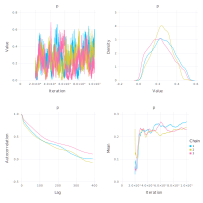

      From worker 3:	Chain 2: 100% [0:00:00 of 0:00:48 remaining]
      From worker 3:	


In [13]:
scheme_bmc3 = [NUTS(:p), BMC3([:true_answers, :first_coin_flips, :second_coin_flips])]
setsamplers!(model, scheme_bmc3)
sim_bmc3 = mcmc(model, data, inits, samplings, burnin = burning, thin = 10, chains = 3)
p_bmc3 = reshape(Mamba.plot(sim_bmc3, [:trace, :density, :autocor, :mean], legend = true), (2, 2))
Mamba.draw(p_bmc3, nrow = 2, ncol = 2)

In [17]:
gelmandiag(sim_bmc3, mpsrf = true, transform = true)

              PSRF 97.5%
           p 1.028  1.07
Multivariate 1.030   NaN



### BMG

MCMC Simulation of 100000 Iterations x 3 Chains...

      From worker 3:	Chain 2:   0% [5:20:13 of 5:20:15 remaining]
      From worker 2:	Chain 3:   0% [5:24:03 of 5:24:05 remaining]
      From worker 4:	Chain 1:   0% [5:24:33 of 5:24:35 remaining]
      From worker 3:	Chain 2:  10% [0:01:16 of 0:01:25 remaining]
      From worker 2:	Chain 3:  10% [0:01:18 of 0:01:26 remaining]
      From worker 4:	Chain 1:  10% [0:01:19 of 0:01:27 remaining]
      From worker 4:	Chain 1:  20% [0:01:02 of 0:01:18 remaining]
      From worker 3:	Chain 2:  20% [0:01:03 of 0:01:18 remaining]
      From worker 2:	Chain 3:  20% [0:01:03 of 0:01:19 remaining]
      From worker 2:	Chain 3:  30% [0:00:53 of 0:01:15 remaining]
      From worker 4:	Chain 1:  30% [0:00:53 of 0:01:16 remaining]
      From worker 3:	Chain 2:  30% [0:00:54 of 0:01:17 remaining]
      From worker 2:	Chain 3:  40% [0:00:43 of 0:01:12 remaining]
      From worker 4:	Chain 1:  40% [0:00:44 of 0:01:13 remaining]
      From worker 3:	Cha

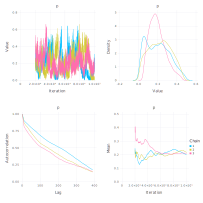

      From worker 3:	Chain 2: 100% [0:00:00 of 0:01:13 remaining]
      From worker 3:	


In [18]:
scheme_bmg = [NUTS(:p), BMG([:true_answers, :first_coin_flips, :second_coin_flips])]
setsamplers!(model, scheme_bmg)
sim_bmg = mcmc(model, data, inits, samplings, burnin = burning, thin = 10, chains = 3)
p_bmg = reshape(Mamba.plot(sim_bmg, [:trace, :density, :autocor, :mean], legend = true), (2, 2))
Mamba.draw(p_bmg, nrow = 2, ncol = 2)

In [19]:
gelmandiag(sim_bmg, mpsrf = true, transform = true)

              PSRF 97.5%
           p 1.048 1.084
Multivariate 1.021   NaN



## もう一つのモデル

In [22]:
another_model = Model(
    obs = Stochastic(
        (p, N) -> 
            (p_skewed = 0.5 * p + 0.25;
            Binomial(N, p_skewed)),
        false
    ),
    
    p = Stochastic(() -> Uniform()),
)

Object of type "Model"
-------------------------------------------------------------------------------
p:
A monitored node of type "ScalarStochastic"
NaN
-------------------------------------------------------------------------------
obs:
An unmonitored node of type "ScalarStochastic"
NaN


MCMC Simulation of 100000 Iterations x 3 Chains...

      From worker 4:	Chain 2:   0% [0:21:05 of 0:21:06 remaining]
      From worker 3:	Chain 3:   0% [0:24:16 of 0:24:16 remaining]
      From worker 2:	Chain 1:   0% [0:22:53 of 0:22:53 remaining]
      From worker 2:	Chain 1:  10% [0:00:24 of 0:00:27 remaining]
      From worker 4:	Chain 2:  10% [0:00:26 of 0:00:28 remaining]
      From worker 3:	Chain 3:  10% [0:00:26 of 0:00:29 remaining]
      From worker 2:	Chain 1:  20% [0:00:19 of 0:00:24 remaining]
      From worker 4:	Chain 2:  20% [0:00:20 of 0:00:25 remaining]
      From worker 3:	Chain 3:  20% [0:00:20 of 0:00:25 remaining]
      From worker 2:	Chain 1:  30% [0:00:16 of 0:00:23 remaining]
      From worker 4:	Chain 2:  30% [0:00:17 of 0:00:24 remaining]
      From worker 3:	Chain 3:  30% [0:00:17 of 0:00:24 remaining]
      From worker 2:	Chain 1:  40% [0:00:13 of 0:00:22 remaining]
      From worker 4:	Chain 2:  40% [0:00:14 of 0:00:23 remaining]
      From worker 3:	Cha

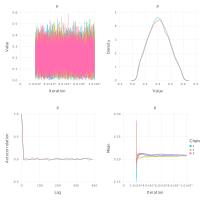

      From worker 3:	Chain 3: 100% [0:00:00 of 0:00:22 remaining]
      From worker 3:	


In [23]:
another_scheme = [NUTS(:p)]
setsamplers!(another_model, another_scheme)
another_sim = mcmc(another_model, data, inits, samplings, burnin = burning, thin = 10, chains = 3)
another_p = reshape(Mamba.plot(another_sim, [:trace, :density, :autocor, :mean], legend = true), (2, 2))
Mamba.draw(another_p, nrow = 2, ncol = 2)